In [1]:
!pip install scikit-surprise==1.0.4

  Using cached scikit-surprise-1.0.4.tar.gz (2.3 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
  Running setup.py install for scikit-surprise: started
  Running setup.py install for scikit-surprise: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [70 lines of output]
  C:\Users\Ichlas\anaconda3\lib\site-packages\setuptools\dist.py:771: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    warnings.warn(
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\dataset.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\dump.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\evaluate.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\__init__.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\__main__.py -> build\lib.win-amd64-cpython-39\surprise
  creating 

In [1]:
import pandas as pd
import random
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import os
os.getcwd()

'C:\\Users\\Ichlas\\Desktop\\ReThread\\ReThread'

In [3]:
# Path to the CSV file
csv_file_path = './FashionProductImages.csv'
image_folder = './myntradataset/images/'

# Read the CSV file into a DataFrame
df_old = pd.read_csv(csv_file_path, on_bad_lines='skip')

# Display the first few rows of the DataFrame
print(df_old.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [4]:
# Generate random user IDs
df_old['seller_id'] = np.random.randint(1, 200, size=len(df_old))
df_old['num_of_products'] = df_old.groupby('seller_id')['id'].transform('count')
print(df_old.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  seller_id  \
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt        116   
1  2012.0  Casual             Peter England Men Party Blue Jeans        178   
2  2016.0  Casual                       Titan Women Silver Watch        115   
3  2011.0  Casual  Manchester United Men Solid Black Track Pants        174   
4  2012.0  Casual                          Puma Men Grey T-shirt         43   

   num_of_products  
0              227  
1             

In [7]:
# Creating users dataset

# Set the number of users and total dataset size
num_users = 500
dataset_size = 5000

# Generate random user IDs
user_ids = np.random.randint(1, num_users + 1, size=dataset_size)
        
# Randomly select fashion IDs from 'df_old' dataset
fashion_ids = np.random.choice(df_old['id'], size=dataset_size)

# Generate random ratings between 0.0 and 5.0
ratings = np.random.uniform(0.0, 5.0, size=dataset_size)
rounded_ratings = np.round(ratings, decimals=1)

rated_sellers_ids = np.random.randint(1, 201, size=dataset_size)

# Create the user dataset DataFrame
user_ratings = pd.DataFrame({
    'user_id': user_ids,
    'fashion_id': fashion_ids,
    'ratings': rounded_ratings,
    'rated_sellers_id': rated_sellers_ids
})

# Display the user dataset
print(user_ratings.head())

   user_id  fashion_id  ratings  rated_sellers_id
0      178       34689      1.3               125
1       66       45422      4.6               143
2      476       47181      2.3                95
3       94       17961      1.6                85
4      206       16114      2.4               149


In [8]:
# Creating sellers dataset

# Set the number of users and total dataset size
num_sellers = 200
dataset_size = 200

# Generate random user IDs
seller_ids = np.arange(1, num_sellers + 1)

# Calculate average ratings for each seller from 'user_ratings' dataset
average_ratings = user_ratings.groupby('rated_sellers_id')['ratings'].mean().values
rounded_ratings = np.round(average_ratings, decimals=1)

# Calculate the number of reviewers for each seller from 'user_ratings' dataset
num_reviewers = user_ratings['rated_sellers_id'].value_counts().sort_index().values

# Create the user dataset DataFrame
seller_ratings = pd.DataFrame({
    'seller_id': seller_ids,
    'seller_ratings': rounded_ratings,
    'num_of_reviewers': num_reviewers
})

# Display the user dataset
print(seller_ratings.head())

   seller_id  seller_ratings  num_of_reviewers
0          1             2.8                29
1          2             2.4                28
2          3             2.6                20
3          4             2.6                36
4          5             3.1                17


In [9]:
# Merge the 'seller_ratings' dataset with the other dataset based on 'seller_id'
df = pd.merge(df_old, seller_ratings[['seller_id', 'seller_ratings', 'num_of_reviewers']], on='seller_id', how='left')

# Display the merged dataset
print(df.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  seller_id  \
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt         34   
1  2012.0  Casual             Peter England Men Party Blue Jeans        180   
2  2016.0  Casual                       Titan Women Silver Watch         37   
3  2011.0  Casual  Manchester United Men Solid Black Track Pants          7   
4  2012.0  Casual                          Puma Men Grey T-shirt         58   

   num_of_products  seller_ratings  num_of_reviewers  
0

In [10]:
seller_ratings = pd.merge(seller_ratings, df_old[['seller_id', 'num_of_products']], on='seller_id', how='left')
# Display the user dataset
print(seller_ratings.head())

   seller_id  seller_ratings  num_of_reviewers  num_of_products
0          1             2.8                29            242.0
1          1             2.8                29            242.0
2          1             2.8                29            242.0
3          1             2.8                29            242.0
4          1             2.8                29            242.0


In [11]:
def get_image_path(row):
    image_id = row['id']
    image_path = os.path.join(image_folder, str(image_id) + '.jpg')
    return image_path

In [12]:
df['image_path'] = df.apply(get_image_path, axis=1)
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,seller_id,num_of_products,seller_ratings,num_of_reviewers,image_path
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,34,199,2.6,35,./images/15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,180,227,2.5,18,./images/39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,37,236,2.6,31,./images/59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,7,239,2.1,19,./images/21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,58,233,2.7,21,./images/53759.jpg


In [13]:
df.shape

(44424, 15)

In [14]:
# Add a new label for number of reviewer and avarage reviews
df['reviewers'] = [random.randint(1, 235) for _ in range(len(df))]
df['ratings'] = [round(random.uniform(0, 5), 1) for _ in range(len(df))]

print(df['reviewers'].head())
print(df['ratings'].head())

0    209
1    232
2     33
3    183
4      6
Name: reviewers, dtype: int64
0    0.8
1    2.5
2    1.9
3    3.0
4    1.3
Name: ratings, dtype: float64


In [15]:
# Demographic Filtering = Recommendation based on popular sellers, will be displayed for new users
C= df['seller_ratings'].mean()
C

2.4822483342338044

In [16]:
m= df['reviewers'].quantile(0.9)
m

212.0

In [17]:
# We will now make a new dataset of top trend clothings
q_fashions = df.copy().loc[df['reviewers'] >= m]
q_fashions.shape

(4608, 17)

In [18]:
# We will define a function, weighted_rating() and define a new feature score,
# of which we'll calculate the value by applying this function to our DataFrame of top trend clothings:
def weighted_rating(x, m=m, C=C):
    v = x['reviewers']
    R = x['ratings']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [19]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_fashions['score'] = q_fashions.apply(weighted_rating, axis=1)

In [20]:
#Sort movies based on score calculated above
q_fashions = q_fashions.sort_values('score', ascending=False)
q_fashions.insert(0, 'no', range(1, len(q_fashions) + 1))

#Print the top 15 movies
q_fashions.head(10)

,no,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,seller_id,num_of_products,seller_ratings,num_of_reviewers,image_path,reviewers,ratings,score
30493,1,53013,Women,Apparel,Saree,Sarees,Multi,Fall,2012.0,Ethnic,FNF Multi Coloured Sari,79,210,2.2,27,./images/53013.jpg,235,5.0,3.805899
5759,2,34785,Men,Footwear,Sandal,Sports Sandals,Grey,Summer,2012.0,Casual,Fila Men Benton Grey Sandals,139,229,2.5,22,./images/34785.jpg,235,5.0,3.805899
18925,3,26185,Women,Footwear,Shoes,Flats,Brown,Winter,2012.0,Casual,Rocia Women Brown Casual Sandals,29,229,3.1,22,./images/26185.jpg,235,5.0,3.805899
17150,4,32525,Men,Personal Care,Fragrance,Perfume and Body Mist,Silver,Spring,2017.0,Casual,Tonino Lamborghini Men Mitico Perfume,34,199,2.6,35,./images/32525.jpg,234,5.0,3.803221
3528,5,19787,Men,Apparel,Topwear,Tshirts,White,Winter,2016.0,Casual,U.S. Polo Assn. Men Solid White Tshirt,60,206,2.7,19,./images/19787.jpg,234,5.0,3.803221
34374,6,9935,Men,Apparel,Topwear,Tshirts,Navy Blue,Fall,2011.0,Casual,Basics Men Navy T-shirt,104,201,2.2,28,./images/9935.jpg,231,5.0,3.795117
6791,7,10142,Men,Footwear,Shoes,Casual Shoes,Brown,Fall,2011.0,Casual,Rockport Men Captoe Brown Casual Shoes,10,218,2.9,24,./images/10142.jpg,231,5.0,3.795117
30926,8,49941,Men,Apparel,Topwear,Tshirts,Red,Summer,2016.0,Casual,Hanes Men Red T-shirt,190,223,3.0,24,./images/49941.jpg,230,5.0,3.792391
15255,9,20567,Women,Accessories,Bags,Handbags,Gold,Winter,2015.0,Casual,Baggit Women Barbiex Avni Gold Handbag,99,196,2.9,30,./images/20567.jpg,229,5.0,3.789652
26245,10,27674,Women,Accessories,Bags,Handbags,Yellow,Winter,2015.0,Casual,Murcia Women Yellow Handbag,66,224,2.6,24,./images/27674.jpg,229,5.0,3.789652


Trending  1


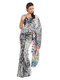

Sarees
----------------------
Trending  2


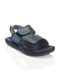

Sports Sandals
----------------------
Trending  3


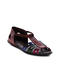

Flats
----------------------
Trending  4


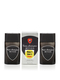

Perfume and Body Mist
----------------------
Trending  5


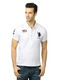

Tshirts
----------------------
Trending  6


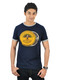

Tshirts
----------------------
Trending  7


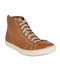

Casual Shoes
----------------------
Trending  8


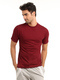

Tshirts
----------------------
Trending  9


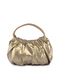

Handbags
----------------------
Trending  10


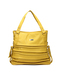

Handbags
----------------------


In [21]:
from PIL import Image
from IPython.display import display

# Iterate over the sorted DataFrame and display the images
for index, row in q_fashions.head(10).iterrows():
    image_path = row['image_path']
    image_name = row['articleType']
    image_no = row['no']
    image = Image.open(image_path)
    print("Trending ", image_no)
    display(image)
    print(image_name)
    print("----------------------")

In [22]:
# Collaborative Filtering


In [24]:
from surprise import Reader, Dataset, SVD, evaluate

data = Dataset.load_from_df(user_ratings[['user_id', 'fashion_id', 'ratings']], reader)
data.split(n_folds=5)

ModuleNotFoundError: No module named 'surprise'